In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_2264\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [6]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [7]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [8]:
df.shape

(994879, 4)

In [9]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [10]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

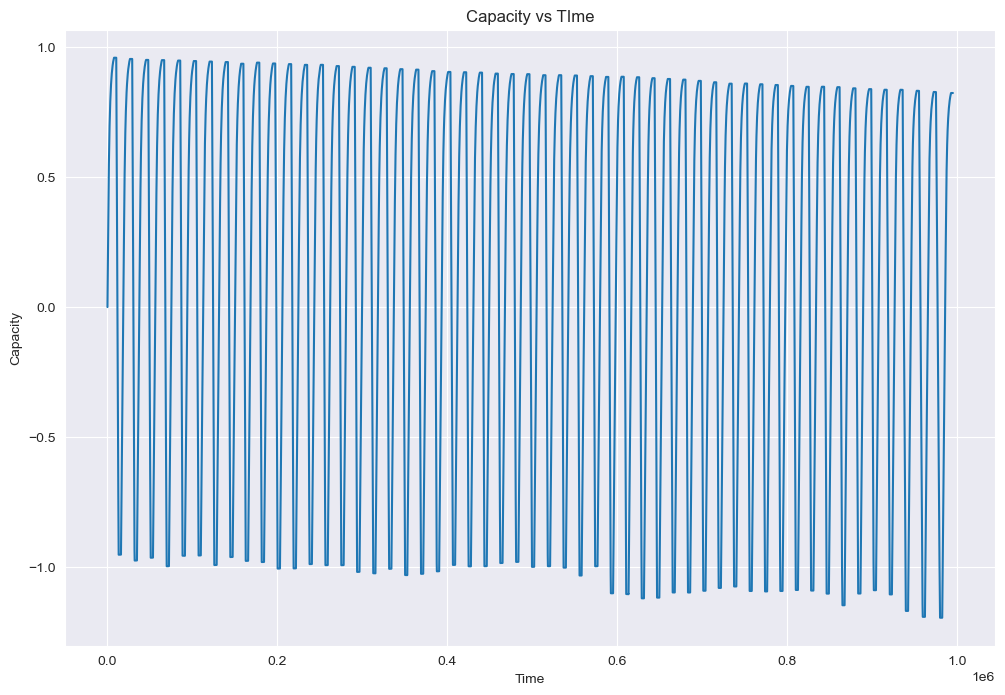

In [12]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Local Maxima and Minima

In [13]:
# %%time
# from scipy.signal import argrelextrema
# import numpy as np

# ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
# ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

# df.Capacity.plot(figsize=(20,12), alpha=.3)
# # filter prices that are peaks and plot them differently to be visable on the plot
# df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
# df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
# plt.ylabel("Capacity")
# plt.xlabel("Time")
# plt.title('Local Maxima and Local Minima')

In [14]:
# maximum_point = df['Capacity'][ilocs_max].unique()
# minimum_point = df['Capacity'][ilocs_min].unique()

In [15]:
# print(maximum_point)
# print(maximum_point.max())
# print(minimum_point)

In [16]:
df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [17]:
df.head(20)

,Time,Potential,Current,Capacity,SOC,Charge
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338
5,5.0,3.95467,1.24789,0.001624,0.001692,5.84639
6,6.0,3.95637,1.24791,0.001995,0.002078,7.18165
7,7.0,3.95793,1.24789,0.002321,0.002417,8.35467
8,8.0,3.95938,1.24790,0.002692,0.002804,9.68992
9,9.0,3.96077,1.24789,0.003017,0.003143,10.86290


# Integral current

In [18]:
from scipy.integrate import cumulative_trapezoid

p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

df.loc[:, "Integral_current"] = integral

Text(0.5, 1.0, 'Dataset')

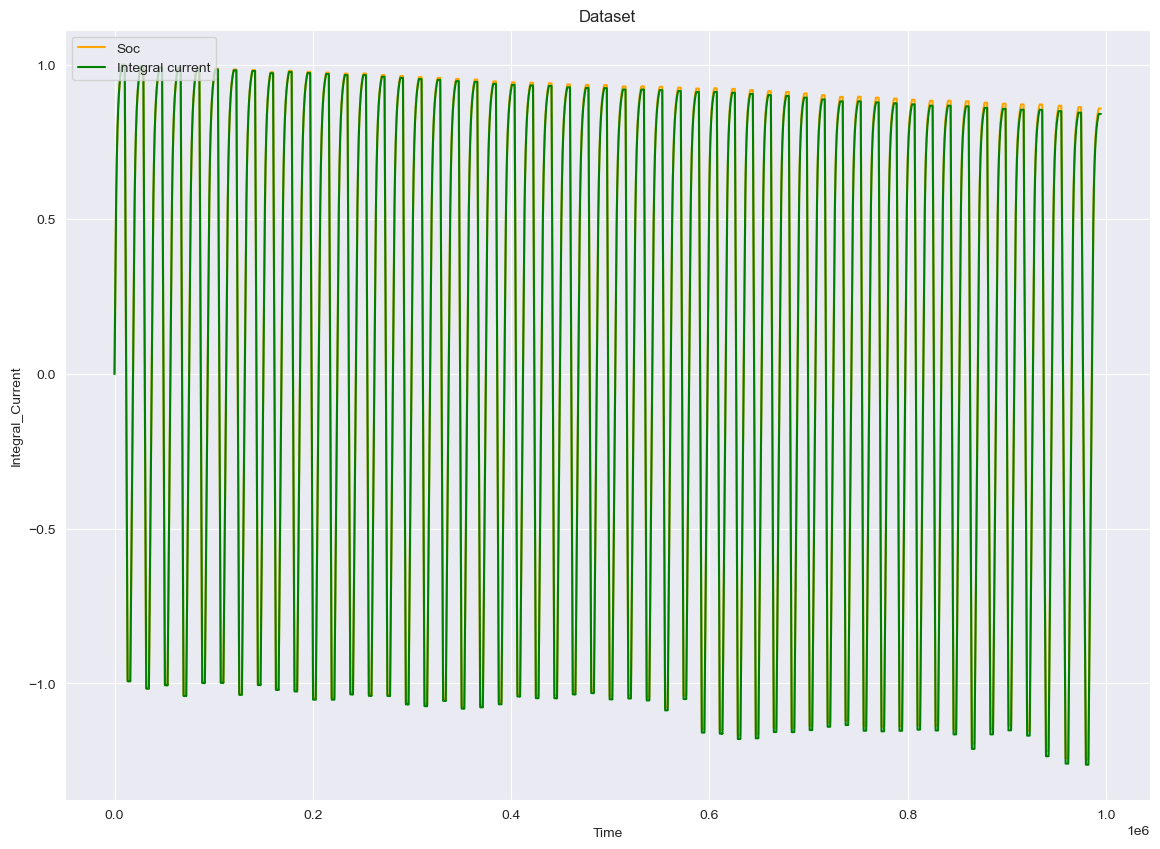

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='orange')
plt.plot(df['Integral_current'],color='green')
plt.ylabel('Integral_Current')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [20]:
df.head()

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000,0.000000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737,0.000181
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510,0.000542
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812,0.000903
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338,0.001264


In [21]:
df.insert(loc = 5,column ='Power',value=df['Current']*df["Potential"])

In [22]:
df.describe()

,Time,Potential,Current,Capacity,SOC,Power,Charge,Integral_current
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.152622,0.285109,527.461697,0.142881
std,288767.217690,0.382038,1.142440,0.752569,0.783926,3.993079,2709.247496,0.784457
min,0.500000,2.750290,-2.503150,-1.195086,-1.244881,-9.777741,-4302.310000,-1.262688
25%,250933.600000,3.475400,0.000000,-0.602635,-0.627745,0.000000,-2169.485000,-0.637721
50%,501905.600000,4.147310,0.072232,0.455186,0.474152,0.303331,1638.670000,0.464311
75%,751231.300000,4.199370,0.795196,0.839904,0.874900,3.339343,3023.655000,0.862360
max,999999.600000,4.199950,1.364510,0.959319,0.999291,5.730082,3453.550000,0.999371


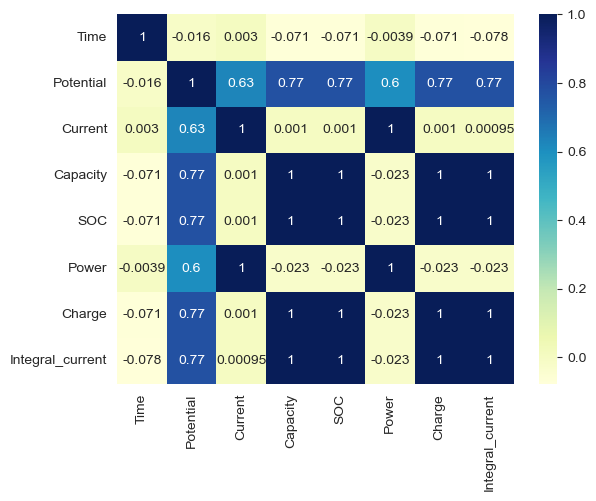

<Figure size 1400x1000 with 0 Axes>

In [23]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

# Modeling

In [24]:
timest = df.pop('Time')

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Potential','Current','Capacity','SOC','Power','Charge','Integral_current'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [26]:
df.head()

,Potential,Current,Capacity,SOC,Power,Charge,Integral_current
0,0.822158,0.969868,0.554717,0.554717,0.947742,0.554717,0.558203
1,0.824159,0.969847,0.554823,0.554823,0.947955,0.554823,0.558283
2,0.826242,0.969850,0.554996,0.554996,0.948200,0.554996,0.558443
3,0.828049,0.969850,0.555148,0.555148,0.948411,0.555148,0.558602
4,0.829519,0.969850,0.555320,0.555320,0.948583,0.555320,0.558762


In [27]:
Y = df.pop('Power')
X = df

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [29]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 6), (198976, 6), (795903,), (198976,))

In [30]:
X_train.head()

,Potential,Current,Capacity,SOC,Charge,Integral_current
670405,0.834044,0.969785,0.499969,0.499969,0.499969,0.497979
694484,0.999614,0.667024,0.950260,0.950260,0.950260,0.944675
537762,0.496710,0.647200,0.089460,0.089460,0.089460,0.091848
807043,0.985548,0.647200,0.949679,0.949679,0.949679,0.943325
837357,0.999614,0.704041,0.902373,0.902373,0.902373,0.896085


In [31]:
Y_train.head()

670405    0.949047
694484    0.651266
537762    0.630504
807043    0.630504
837357    0.690035
Name: Power, dtype: float64

In [32]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:

callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

# AIC Function

In [35]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):
    # model = model_1

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

# Modeling

In [36]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(70,activation = 'linear'),
                               tf.keras.layers.Dense(50, activation = 'linear'),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=128,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 17s 3ms/step - loss: 0.0149 - rmse: 0.0289 - mae: 0.0149 - mse: 8.3548e-04 - mape: 24.1074 - val_loss: 0.0128 - val_rmse: 0.0202 - val_mae: 0.0128 - val_mse: 4.0893e-04 - val_mape: 5.6928
Epoch 2/100
6218/6218 [==============================] - 21s 3ms/step - loss: 0.0132 - rmse: 0.0199 - mae: 0.0132 - mse: 3.9464e-04 - mape: 22.7322 - val_loss: 0.0129 - val_rmse: 0.0199 - val_mae: 0.0129 - val_mse: 3.9522e-04 - val_mape: 5.3452
Epoch 3/100
6218/6218 [==============================] - 18s 3ms/step - loss: 0.0130 - rmse: 0.0198 - mae: 0.0130 - mse: 3.9151e-04 - mape: 19.7316 - val_loss: 0.0126 - val_rmse: 0.0197 - val_mae: 0.0126 - val_mse: 3.8667e-04 - val_mape: 5.3959
Epoch 4/100
6218/6218 [==============================] - 19s 3ms/step - loss: 0.0129 - rmse: 0.0198 - mae: 0.0129 - mse: 3.9020e-04 - mape: 26.3201 - val_loss: 0.0126 - val_rmse: 0.0196 - val_mae: 0.0126 - val_mse: 3.8438e-04 - val_mape: 5.3276
Epoch 5/100
6218/621

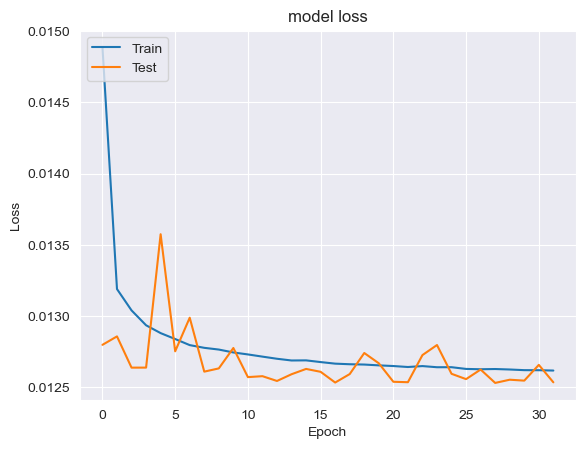

In [37]:
plot_his(history_1)

In [38]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 0.0125 - rmse: 0.0196 - mae: 0.0125 - mse: 3.8370e-04 - mape: 5.3574


[0.01253621093928814,
 0.019588178023695946,
 0.01253621093928814,
 0.00038369675166904926,
 5.357404708862305]

In [39]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [40]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                490       
                                                                 
 dense_1 (Dense)             (None, 50)                3550      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,081
Trainable params: 5,081
Non-trainable params: 0
_________________________________________________________________


In [41]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  10160.823


# Model 2

In [42]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 88s 4ms/step - loss: 0.0014 - rmse: 0.0093 - mae: 0.0014 - mse: 8.6757e-05 - mape: 3.1892 - val_loss: 4.2575e-04 - val_rmse: 6.1593e-04 - val_mae: 4.2575e-04 - val_mse: 3.7937e-07 - val_mape: 0.2047
Epoch 2/100
24872/24872 [==============================] - 91s 4ms/step - loss: 3.1026e-04 - rmse: 5.4417e-04 - mae: 3.1026e-04 - mse: 2.9612e-07 - mape: 2.8283 - val_loss: 2.8292e-04 - val_rmse: 5.0475e-04 - val_mae: 2.8292e-04 - val_mse: 2.5477e-07 - val_mape: 0.0960
Epoch 3/100
24872/24872 [==============================] - 92s 4ms/step - loss: 2.2491e-04 - rmse: 4.5443e-04 - mae: 2.2491e-04 - mse: 2.0651e-07 - mape: 3.5409 - val_loss: 2.0691e-04 - val_rmse: 4.2280e-04 - val_mae: 2.0691e-04 - val_mse: 1.7876e-07 - val_mape: 0.0841
Epoch 4/100
24872/24872 [==============================] - 92s 4ms/step - loss: 1.8849e-04 - rmse: 4.2382e-04 - mae: 1.8849e-04 - mse: 1.7963e-07 - mape: 3.0203 - val_loss: 1.6322e-04 - val_rmse: 4.0634

24872/24872 [==============================] - 85s 3ms/step - loss: 8.1014e-05 - rmse: 3.3711e-04 - mae: 8.1014e-05 - mse: 1.1365e-07 - mape: 4.0440 - val_loss: 8.1883e-05 - val_rmse: 3.2706e-04 - val_mae: 8.1883e-05 - val_mse: 1.0697e-07 - val_mape: 0.0607
Epoch 32/100
24872/24872 [==============================] - 86s 3ms/step - loss: 8.0589e-05 - rmse: 3.3707e-04 - mae: 8.0589e-05 - mse: 1.1361e-07 - mape: 4.0260 - val_loss: 7.5398e-05 - val_rmse: 3.2832e-04 - val_mae: 7.5398e-05 - val_mse: 1.0779e-07 - val_mape: 0.0554
Epoch 33/100
24872/24872 [==============================] - 91s 4ms/step - loss: 8.0083e-05 - rmse: 3.3686e-04 - mae: 8.0083e-05 - mse: 1.1348e-07 - mape: 4.0144 - val_loss: 8.4231e-05 - val_rmse: 3.2744e-04 - val_mae: 8.4231e-05 - val_mse: 1.0722e-07 - val_mape: 0.0586
Epoch 34/100
24872/24872 [==============================] - 86s 3ms/step - loss: 7.9601e-05 - rmse: 3.3649e-04 - mae: 7.9601e-05 - mse: 1.1323e-07 - mape: 4.2340 - val_loss: 7.6166e-05 - val_rmse: 3.2

In [43]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 7.2897e-05 - rmse: 3.2740e-04 - mae: 7.2897e-05 - mse: 1.0719e-07 - mape: 0.0532


[7.289685163414106e-05,
 0.0003274004557169974,
 7.289685163414106e-05,
 1.0719106313672455e-07,
 0.05316794291138649]

In [44]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 11s 2ms/step


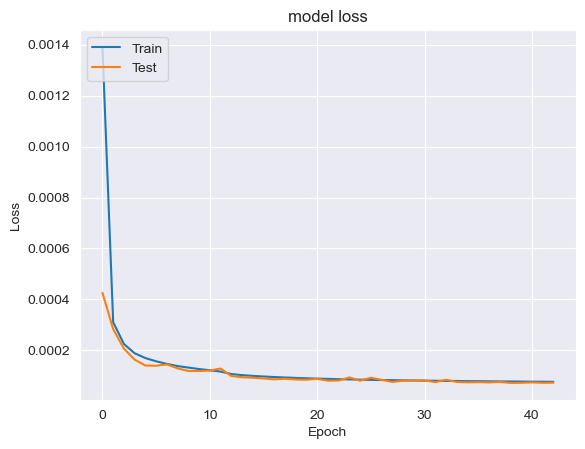

In [45]:
plot_his(history_2)

In [46]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  11600.821


# Model 3

In [47]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train,batch_size=128, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 19s 3ms/step - loss: 0.0057 - rmse: 0.0169 - mae: 0.0057 - mse: 2.8416e-04 - mape: 6.9129 - val_loss: 0.0031 - val_rmse: 0.0034 - val_mae: 0.0031 - val_mse: 1.1363e-05 - val_mape: 0.7374
Epoch 2/100
6218/6218 [==============================] - 21s 3ms/step - loss: 0.0021 - rmse: 0.0028 - mae: 0.0021 - mse: 7.7345e-06 - mape: 9.6716 - val_loss: 0.0017 - val_rmse: 0.0018 - val_mae: 0.0017 - val_mse: 3.4224e-06 - val_mape: 0.5692
Epoch 3/100
6218/6218 [==============================] - 21s 3ms/step - loss: 0.0016 - rmse: 0.0021 - mae: 0.0016 - mse: 4.3952e-06 - mape: 7.6480 - val_loss: 7.4245e-04 - val_rmse: 9.9367e-04 - val_mae: 7.4245e-04 - val_mse: 9.8738e-07 - val_mape: 0.2211
Epoch 4/100
6218/6218 [==============================] - 19s 3ms/step - loss: 0.0012 - rmse: 0.0016 - mae: 0.0012 - mse: 2.6442e-06 - mape: 12.3907 - val_loss: 0.0019 - val_rmse: 0.0020 - val_mae: 0.0019 - val_mse: 4.1508e-06 - val_mape: 0.4211
Epoch 5/100

Epoch 32/100
6218/6218 [==============================] - 19s 3ms/step - loss: 2.0788e-04 - rmse: 4.8254e-04 - mae: 2.0788e-04 - mse: 2.3285e-07 - mape: 6.7998 - val_loss: 1.3327e-04 - val_rmse: 4.4646e-04 - val_mae: 1.3327e-04 - val_mse: 1.9932e-07 - val_mape: 0.0805
Epoch 33/100
6218/6218 [==============================] - 18s 3ms/step - loss: 1.9728e-04 - rmse: 4.7697e-04 - mae: 1.9728e-04 - mse: 2.2750e-07 - mape: 7.2490 - val_loss: 1.5097e-04 - val_rmse: 4.5493e-04 - val_mae: 1.5097e-04 - val_mse: 2.0696e-07 - val_mape: 0.1085
Epoch 34/100
6218/6218 [==============================] - 15s 2ms/step - loss: 1.8999e-04 - rmse: 4.7497e-04 - mae: 1.8999e-04 - mse: 2.2560e-07 - mape: 6.7739 - val_loss: 2.5866e-04 - val_rmse: 5.1024e-04 - val_mae: 2.5866e-04 - val_mse: 2.6034e-07 - val_mape: 0.0998
Epoch 34: early stopping
CPU times: total: 21min 8s
Wall time: 10min 43s


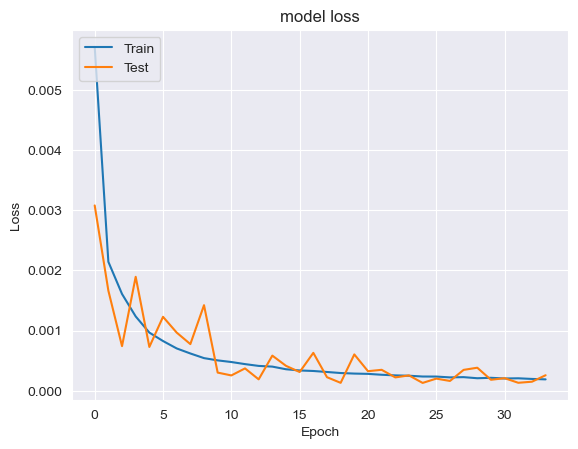

In [48]:
plot_his(history_3)

In [49]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 2.5866e-04 - rmse: 5.1024e-04 - mae: 2.5866e-04 - mse: 2.6034e-07 - mape: 0.0998


[0.0002586644550319761,
 0.0005102353170514107,
 0.0002586644550319761,
 2.6034010147668596e-07,
 0.09978926926851273]

In [50]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [51]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  9120.821


# Model 4

In [52]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(200),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 95s 4ms/step - loss: 0.0021 - rmse: 0.0081 - mae: 0.0021 - mse: 6.5253e-05 - mape: 1.0652 - val_loss: 7.4805e-04 - val_rmse: 0.0010 - val_mae: 7.4805e-04 - val_mse: 1.0230e-06 - val_mape: 0.1968
Epoch 2/100
24872/24872 [==============================] - 94s 4ms/step - loss: 5.3188e-04 - rmse: 8.5986e-04 - mae: 5.3188e-04 - mse: 7.3936e-07 - mape: 0.5780 - val_loss: 4.1013e-04 - val_rmse: 7.8707e-04 - val_mae: 4.1013e-04 - val_mse: 6.1949e-07 - val_mape: 0.1124
Epoch 3/100
24872/24872 [==============================] - 99s 4ms/step - loss: 4.1913e-04 - rmse: 7.8310e-04 - mae: 4.1913e-04 - mse: 6.1324e-07 - mape: 0.9576 - val_loss: 4.1025e-04 - val_rmse: 7.7379e-04 - val_mae: 4.1025e-04 - val_mse: 5.9875e-07 - val_mape: 0.1181
Epoch 4/100
24872/24872 [==============================] - 93s 4ms/step - loss: 3.6507e-04 - rmse: 7.7018e-04 - mae: 3.6507e-04 - mse: 5.9317e-07 - mape: 0.8492 - val_loss: 4.1264e-04 - val_rmse: 7.7447e-04

24872/24872 [==============================] - 96s 4ms/step - loss: 2.3791e-04 - rmse: 5.8250e-04 - mae: 2.3791e-04 - mse: 3.3931e-07 - mape: 0.5673 - val_loss: 2.3819e-04 - val_rmse: 5.8889e-04 - val_mae: 2.3819e-04 - val_mse: 3.4680e-07 - val_mape: 0.0705
Epoch 32/100
24872/24872 [==============================] - 92s 4ms/step - loss: 2.3682e-04 - rmse: 5.8094e-04 - mae: 2.3682e-04 - mse: 3.3749e-07 - mape: 0.5438 - val_loss: 2.3460e-04 - val_rmse: 5.7957e-04 - val_mae: 2.3460e-04 - val_mse: 3.3590e-07 - val_mape: 0.0620
Epoch 33/100
24872/24872 [==============================] - 96s 4ms/step - loss: 2.3603e-04 - rmse: 5.7968e-04 - mae: 2.3603e-04 - mse: 3.3603e-07 - mape: 0.4999 - val_loss: 2.5214e-04 - val_rmse: 5.9876e-04 - val_mae: 2.5214e-04 - val_mse: 3.5852e-07 - val_mape: 0.0722
Epoch 34/100
24872/24872 [==============================] - 89s 4ms/step - loss: 2.3560e-04 - rmse: 5.7856e-04 - mae: 2.3560e-04 - mse: 3.3474e-07 - mape: 0.3532 - val_loss: 2.2710e-04 - val_rmse: 5.7

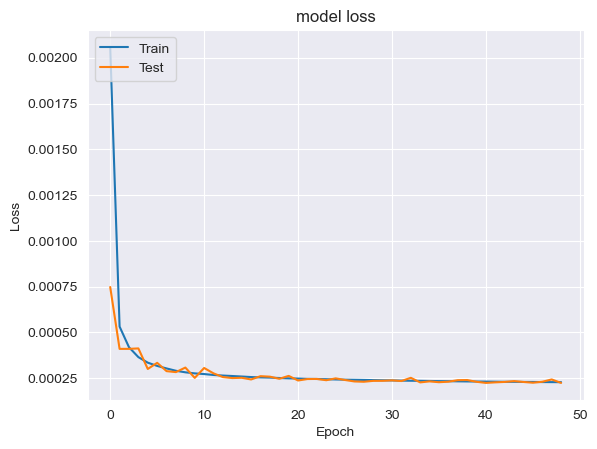

In [53]:
plot_his(history_4)

In [54]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 2.2422e-04 - rmse: 5.6901e-04 - mae: 2.2422e-04 - mse: 3.2377e-07 - mape: 0.0598


[0.0002242236223537475,
 0.0005690078833140433,
 0.0002242236223537475,
 3.237699672808958e-07,
 0.05978021398186684]

In [55]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 6s 961us/step


In [56]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  23940.822


# Model 5

In [59]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
24872/24872 [==============================] - 132s 5ms/step - loss: 0.0109 - rmse: 0.0303 - mae: 0.0109 - mse: 9.1973e-04 - mape: 144.6211 - val_loss: 0.0024 - val_rmse: 0.0042 - val_mae: 0.0024 - val_mse: 1.7265e-05 - val_mape: 1.2121
Epoch 2/50
24872/24872 [==============================] - 133s 5ms/step - loss: 0.0022 - rmse: 0.0033 - mae: 0.0022 - mse: 1.1105e-05 - mape: 31.2638 - val_loss: 0.0018 - val_rmse: 0.0022 - val_mae: 0.0018 - val_mse: 5.0507e-06 - val_mape: 0.6002
Epoch 3/50
24872/24872 [==============================] - 132s 5ms/step - loss: 0.0012 - rmse: 0.0017 - mae: 0.0012 - mse: 2.9111e-06 - mape: 26.1829 - val_loss: 8.9295e-04 - val_rmse: 0.0012 - val_mae: 8.9295e-04 - val_mse: 1.4643e-06 - val_mape: 0.3336
Epoch 4/50
24872/24872 [==============================] - 132s 5ms/step - loss: 9.0931e-04 - rmse: 0.0013 - mae: 9.0931e-04 - mse: 1.6303e-06 - mape: 18.2363 - val_loss: 5.1150e-04 - val_rmse: 8.6948e-04 - val_mae: 5.1150e-04 - val_mse: 7.5599e-07 - 

24872/24872 [==============================] - 129s 5ms/step - loss: 2.0458e-04 - rmse: 3.2110e-04 - mae: 2.0458e-04 - mse: 1.0311e-07 - mape: 8.4198 - val_loss: 1.7241e-04 - val_rmse: 2.9447e-04 - val_mae: 1.7241e-04 - val_mse: 8.6711e-08 - val_mape: 0.0946
Epoch 32/50
24872/24872 [==============================] - 129s 5ms/step - loss: 2.0132e-04 - rmse: 3.1677e-04 - mae: 2.0132e-04 - mse: 1.0034e-07 - mape: 8.2672 - val_loss: 1.7792e-04 - val_rmse: 2.9073e-04 - val_mae: 1.7792e-04 - val_mse: 8.4525e-08 - val_mape: 0.0931
Epoch 33/50
24872/24872 [==============================] - 130s 5ms/step - loss: 1.9835e-04 - rmse: 3.1372e-04 - mae: 1.9835e-04 - mse: 9.8422e-08 - mape: 8.4445 - val_loss: 1.6245e-04 - val_rmse: 2.8639e-04 - val_mae: 1.6245e-04 - val_mse: 8.2020e-08 - val_mape: 0.0895
Epoch 34/50
24872/24872 [==============================] - 129s 5ms/step - loss: 1.9536e-04 - rmse: 3.1020e-04 - mae: 1.9536e-04 - mse: 9.6224e-08 - mape: 8.1530 - val_loss: 1.6797e-04 - val_rmse: 2.

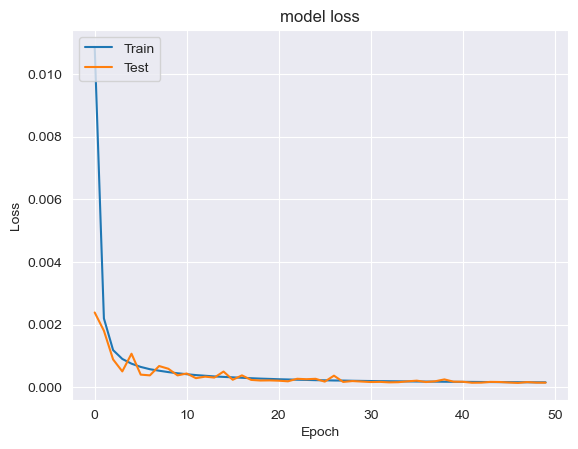

In [60]:
plot_his(history_5)

In [61]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 20s 3ms/step - loss: 1.5215e-04 - rmse: 2.6031e-04 - mae: 1.5215e-04 - mse: 6.7759e-08 - mape: 0.0783


[0.00015215013991110027,
 0.0002603057655505836,
 0.00015215013991110027,
 6.775909611178577e-08,
 0.07826711237430573]

In [62]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 50)             10400     
                                                                 
 lstm_3 (LSTM)               (None, 10)                2440      
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [63]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 19s 3ms/step


In [64]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25700.822


# Model 6

In [65]:
%%time
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 205s 8ms/step - loss: 0.0072 - rmse: 0.0242 - mae: 0.0072 - mse: 5.8579e-04 - mape: 37.8149 - val_loss: 0.0015 - val_rmse: 0.0022 - val_mae: 0.0015 - val_mse: 4.7375e-06 - val_mape: 0.3751
Epoch 2/40
24872/24872 [==============================] - 196s 8ms/step - loss: 0.0016 - rmse: 0.0022 - mae: 0.0016 - mse: 4.8484e-06 - mape: 3.9527 - val_loss: 6.0658e-04 - val_rmse: 9.5225e-04 - val_mae: 6.0658e-04 - val_mse: 9.0678e-07 - val_mape: 0.1495
Epoch 3/40
24872/24872 [==============================] - 197s 8ms/step - loss: 9.2413e-04 - rmse: 0.0013 - mae: 9.2413e-04 - mse: 1.6491e-06 - mape: 3.8354 - val_loss: 8.4785e-04 - val_rmse: 9.9911e-04 - val_mae: 8.4785e-04 - val_mse: 9.9821e-07 - val_mape: 0.2628
Epoch 4/40
24872/24872 [==============================] - 198s 8ms/step - loss: 6.9336e-04 - rmse: 9.7301e-04 - mae: 6.9336e-04 - mse: 9.4675e-07 - mape: 2.9327 - val_loss: 3.8917e-04 - val_rmse: 6.2988e-04 - val_mae: 3.8917e-04 

24872/24872 [==============================] - 198s 8ms/step - loss: 1.8201e-04 - rmse: 2.7085e-04 - mae: 1.8201e-04 - mse: 7.3362e-08 - mape: 1.9763 - val_loss: 1.5755e-04 - val_rmse: 2.4083e-04 - val_mae: 1.5755e-04 - val_mse: 5.8000e-08 - val_mape: 0.0441
Epoch 32/40
24872/24872 [==============================] - 205s 8ms/step - loss: 1.7825e-04 - rmse: 2.6572e-04 - mae: 1.7825e-04 - mse: 7.0606e-08 - mape: 1.8724 - val_loss: 1.5277e-04 - val_rmse: 2.3288e-04 - val_mae: 1.5277e-04 - val_mse: 5.4233e-08 - val_mape: 0.0432
Epoch 33/40
24872/24872 [==============================] - 211s 8ms/step - loss: 1.7577e-04 - rmse: 2.6172e-04 - mae: 1.7577e-04 - mse: 6.8499e-08 - mape: 2.0077 - val_loss: 1.6512e-04 - val_rmse: 2.3877e-04 - val_mae: 1.6512e-04 - val_mse: 5.7012e-08 - val_mape: 0.0519
Epoch 34/40
24872/24872 [==============================] - 210s 8ms/step - loss: 1.7405e-04 - rmse: 2.5816e-04 - mae: 1.7405e-04 - mse: 6.6646e-08 - mape: 2.3292 - val_loss: 1.7094e-04 - val_rmse: 2.

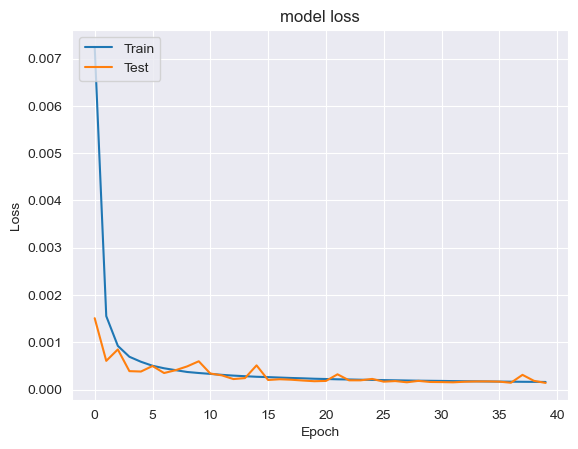

In [66]:
plot_his(history_6)

In [67]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 23s 4ms/step - loss: 1.3990e-04 - rmse: 2.1147e-04 - mae: 1.3990e-04 - mse: 4.4721e-08 - mape: 0.0422


[0.0001399038446834311,
 0.00021147441293578595,
 0.0001399038446834311,
 4.472142478562091e-08,
 0.04220767691731453]

In [68]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 6, 70)             20160     
                                                                 
 lstm_5 (LSTM)               (None, 30)                12120     
                                                                 
 dense_17 (Dense)            (None, 20)                620       
                                                                 
 dense_18 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [69]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 21s 3ms/step


In [70]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65840.82


# Model 7

In [71]:
%%time
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 128,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6218/6218 [==============================] - 58s 9ms/step - loss: 0.0191 - rmse: 0.0536 - mae: 0.0191 - mse: 0.0029 - mape: 183.2086 - val_loss: 0.0083 - val_rmse: 0.0126 - val_mae: 0.0083 - val_mse: 1.5790e-04 - val_mape: 4.3731
Epoch 2/70
6218/6218 [==============================] - 53s 9ms/step - loss: 0.0076 - rmse: 0.0108 - mae: 0.0076 - mse: 1.1654e-04 - mape: 54.4062 - val_loss: 0.0056 - val_rmse: 0.0084 - val_mae: 0.0056 - val_mse: 7.0510e-05 - val_mape: 2.8118
Epoch 3/70
6218/6218 [==============================] - 52s 8ms/step - loss: 0.0050 - rmse: 0.0071 - mae: 0.0050 - mse: 5.0228e-05 - mape: 34.5196 - val_loss: 0.0035 - val_rmse: 0.0053 - val_mae: 0.0035 - val_mse: 2.7570e-05 - val_mape: 1.6342
Epoch 4/70
6218/6218 [==============================] - 51s 8ms/step - loss: 0.0037 - rmse: 0.0052 - mae: 0.0037 - mse: 2.7545e-05 - mape: 8.4711 - val_loss: 0.0028 - val_rmse: 0.0041 - val_mae: 0.0028 - val_mse: 1.7199e-05 - val_mape: 1.2219
Epoch 5/70
6218/6218 [======

Epoch 34/70
6218/6218 [==============================] - 54s 9ms/step - loss: 8.5560e-04 - rmse: 0.0017 - mae: 8.5560e-04 - mse: 2.9280e-06 - mape: 12.8710 - val_loss: 7.3613e-04 - val_rmse: 0.0016 - val_mae: 7.3613e-04 - val_mse: 2.7149e-06 - val_mape: 0.3652
Epoch 35/70
6218/6218 [==============================] - 53s 8ms/step - loss: 8.5659e-04 - rmse: 0.0017 - mae: 8.5659e-04 - mse: 2.8794e-06 - mape: 12.1217 - val_loss: 9.5417e-04 - val_rmse: 0.0017 - val_mae: 9.5417e-04 - val_mse: 2.8835e-06 - val_mape: 0.3942
Epoch 36/70
6218/6218 [==============================] - 53s 9ms/step - loss: 8.3707e-04 - rmse: 0.0017 - mae: 8.3707e-04 - mse: 2.7882e-06 - mape: 11.7792 - val_loss: 0.0014 - val_rmse: 0.0020 - val_mae: 0.0014 - val_mse: 4.0634e-06 - val_mape: 0.4732
Epoch 37/70
6218/6218 [==============================] - 55s 9ms/step - loss: 8.2872e-04 - rmse: 0.0017 - mae: 8.2872e-04 - mse: 2.7288e-06 - mape: 11.8408 - val_loss: 7.1563e-04 - val_rmse: 0.0016 - val_mae: 7.1563e-04 - val

6218/6218 [==============================] - 52s 8ms/step - loss: 6.8127e-04 - rmse: 0.0013 - mae: 6.8127e-04 - mse: 1.7920e-06 - mape: 6.4598 - val_loss: 7.7508e-04 - val_rmse: 0.0014 - val_mae: 7.7508e-04 - val_mse: 1.9031e-06 - val_mape: 0.2858
Epoch 66/70
6218/6218 [==============================] - 51s 8ms/step - loss: 6.7989e-04 - rmse: 0.0013 - mae: 6.7989e-04 - mse: 1.7778e-06 - mape: 6.2928 - val_loss: 6.3492e-04 - val_rmse: 0.0013 - val_mae: 6.3492e-04 - val_mse: 1.6982e-06 - val_mape: 0.2534
Epoch 67/70
6218/6218 [==============================] - 52s 8ms/step - loss: 6.7661e-04 - rmse: 0.0013 - mae: 6.7661e-04 - mse: 1.7604e-06 - mape: 6.4186 - val_loss: 7.2864e-04 - val_rmse: 0.0013 - val_mae: 7.2864e-04 - val_mse: 1.7676e-06 - val_mape: 0.2699
Epoch 68/70
6218/6218 [==============================] - 52s 8ms/step - loss: 6.7073e-04 - rmse: 0.0013 - mae: 6.7073e-04 - mse: 1.7397e-06 - mape: 5.9653 - val_loss: 7.7050e-04 - val_rmse: 0.0014 - val_mae: 7.7050e-04 - val_mse: 1.

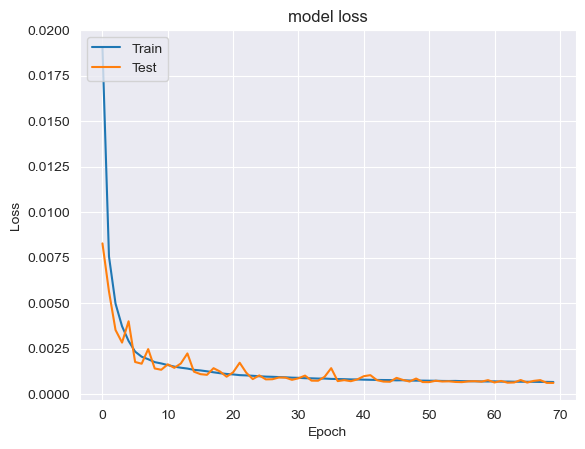

In [72]:
plot_his(history_7)

In [73]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 17s 3ms/step


In [74]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 21s 3ms/step - loss: 6.1611e-04 - rmse: 0.0013 - mae: 6.1611e-04 - mse: 1.6278e-06 - mape: 0.2465


[0.0006161080091260374,
 0.0012758555822074413,
 0.0006161080091260374,
 1.6278075918307877e-06,
 0.2465159296989441]

In [75]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 6, 30)             3840      
                                                                 
 lstm_7 (LSTM)               (None, 10)                1640      
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [76]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  11200.821


# Model 8

In [77]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='linear'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 133s 10ms/step - loss: 0.0121 - rmse: 0.0351 - mae: 0.0121 - mse: 0.0012 - mape: 148.7909 - val_loss: 0.0072 - val_rmse: 0.0131 - val_mae: 0.0072 - val_mse: 1.7164e-04 - val_mape: 4.5252
Epoch 2/40
12436/12436 [==============================] - 132s 11ms/step - loss: 0.0066 - rmse: 0.0123 - mae: 0.0066 - mse: 1.5016e-04 - mape: 106.1820 - val_loss: 0.0058 - val_rmse: 0.0115 - val_mae: 0.0058 - val_mse: 1.3286e-04 - val_mape: 3.9831
Epoch 3/40
12436/12436 [==============================] - 130s 10ms/step - loss: 0.0055 - rmse: 0.0112 - mae: 0.0055 - mse: 1.2635e-04 - mape: 101.8072 - val_loss: 0.0051 - val_rmse: 0.0110 - val_mae: 0.0051 - val_mse: 1.2142e-04 - val_mape: 3.8151
Epoch 4/40
12436/12436 [==============================] - 127s 10ms/step - loss: 0.0050 - rmse: 0.0108 - mae: 0.0050 - mse: 1.1580e-04 - mape: 96.4348 - val_loss: 0.0054 - val_rmse: 0.0107 - val_mae: 0.0054 - val_mse: 1.1534e-04 - val_mape: 3.6574
Epoch 5/4

Epoch 34/40
12436/12436 [==============================] - 166s 13ms/step - loss: 0.0034 - rmse: 0.0079 - mae: 0.0034 - mse: 6.2312e-05 - mape: 74.5036 - val_loss: 0.0034 - val_rmse: 0.0079 - val_mae: 0.0034 - val_mse: 6.2464e-05 - val_mape: 2.5371
Epoch 35/40
12436/12436 [==============================] - 159s 13ms/step - loss: 0.0034 - rmse: 0.0078 - mae: 0.0034 - mse: 6.1507e-05 - mape: 73.6128 - val_loss: 0.0034 - val_rmse: 0.0079 - val_mae: 0.0034 - val_mse: 6.2204e-05 - val_mape: 2.5207
Epoch 36/40
12436/12436 [==============================] - 165s 13ms/step - loss: 0.0034 - rmse: 0.0078 - mae: 0.0034 - mse: 6.0760e-05 - mape: 73.8552 - val_loss: 0.0034 - val_rmse: 0.0078 - val_mae: 0.0034 - val_mse: 6.1090e-05 - val_mape: 2.5051
Epoch 37/40
12436/12436 [==============================] - 160s 13ms/step - loss: 0.0034 - rmse: 0.0077 - mae: 0.0034 - mse: 5.9987e-05 - mape: 73.3285 - val_loss: 0.0033 - val_rmse: 0.0078 - val_mae: 0.0033 - val_mse: 6.0676e-05 - val_mape: 2.4995
Epoc

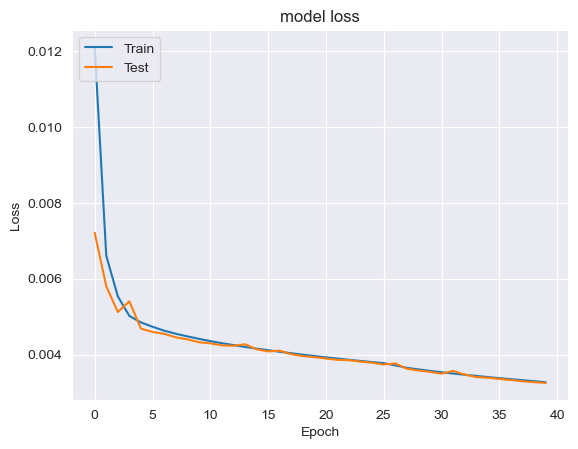

In [78]:
plot_his(history_8)

In [79]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 26s 4ms/step


In [80]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 31s 5ms/step - loss: 0.0033 - rmse: 0.0076 - mae: 0.0033 - mse: 5.8244e-05 - mape: 2.4353


[0.0032528035808354616,
 0.007631765678524971,
 0.0032528035808354616,
 5.824384788866155e-05,
 2.4353320598602295]

In [81]:
AIC_value(model_8,prediction_8,Y_test)

AIC:  65840.82


# Model 9

In [82]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
24872/24872 [==============================] - 88s 3ms/step - loss: 0.0054 - rmse: 0.0274 - mae: 0.0054 - mse: 7.5146e-04 - mape: 34.5467 - val_loss: 0.0019 - val_rmse: 0.0031 - val_mae: 0.0019 - val_mse: 9.4484e-06 - val_mape: 0.6840
Epoch 2/50
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0011 - rmse: 0.0028 - mae: 0.0011 - mse: 7.7999e-06 - mape: 2.4094 - val_loss: 9.7573e-04 - val_rmse: 0.0028 - val_mae: 9.7573e-04 - val_mse: 7.9731e-06 - val_mape: 0.2190
Epoch 3/50
24872/24872 [==============================] - 82s 3ms/step - loss: 9.9521e-04 - rmse: 0.0028 - mae: 9.9521e-04 - mse: 7.6283e-06 - mape: 2.1562 - val_loss: 8.9162e-04 - val_rmse: 0.0028 - val_mae: 8.9162e-04 - val_mse: 7.7550e-06 - val_mape: 0.1949
Epoch 4/50
24872/24872 [==============================] - 76s 3ms/step - loss: 9.4527e-04 - rmse: 0.0027 - mae: 9.4527e-04 - mse: 7.4084e-06 - mape: 1.7854 - val_loss: 0.0011 - val_rmse: 0.0028 - val_mae: 0.0011 - val_mse: 7.9561e-06 - val_

24872/24872 [==============================] - 85s 3ms/step - loss: 7.5937e-04 - rmse: 0.0025 - mae: 7.5937e-04 - mse: 6.4555e-06 - mape: 0.4055 - val_loss: 7.6960e-04 - val_rmse: 0.0026 - val_mae: 7.6960e-04 - val_mse: 6.6842e-06 - val_mape: 0.1748
Epoch 33/50
24872/24872 [==============================] - 78s 3ms/step - loss: 7.5829e-04 - rmse: 0.0025 - mae: 7.5829e-04 - mse: 6.4473e-06 - mape: 0.6103 - val_loss: 7.6265e-04 - val_rmse: 0.0026 - val_mae: 7.6265e-04 - val_mse: 6.6868e-06 - val_mape: 0.1729
Epoch 34/50
24872/24872 [==============================] - 82s 3ms/step - loss: 7.5724e-04 - rmse: 0.0025 - mae: 7.5724e-04 - mse: 6.4401e-06 - mape: 0.4622 - val_loss: 7.7052e-04 - val_rmse: 0.0026 - val_mae: 7.7052e-04 - val_mse: 6.6546e-06 - val_mape: 0.1814
Epoch 35/50
24872/24872 [==============================] - 82s 3ms/step - loss: 7.5576e-04 - rmse: 0.0025 - mae: 7.5576e-04 - mse: 6.4331e-06 - mape: 0.4455 - val_loss: 7.6223e-04 - val_rmse: 0.0026 - val_mae: 7.6223e-04 - val

In [83]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 14s 2ms/step - loss: 7.5093e-04 - rmse: 0.0026 - mae: 7.5093e-04 - mse: 6.6264e-06 - mape: 0.1721


[0.0007509267888963223,
 0.0025741769932210445,
 0.0007509267888963223,
 6.626387403230183e-06,
 0.17214931547641754]

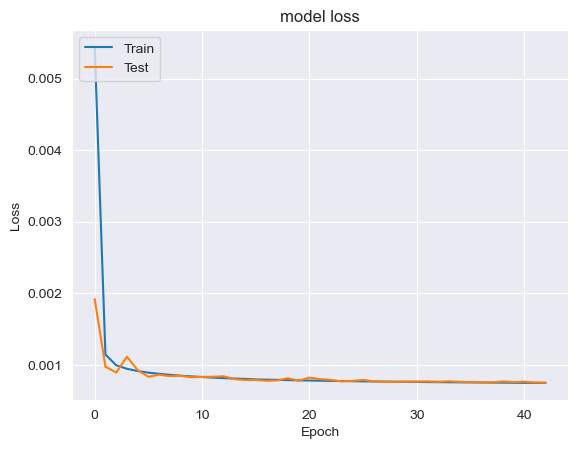

In [84]:
plot_his(history_9)

In [85]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 11s 2ms/step


In [86]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  740.8215


# Model 10

In [87]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 88s 3ms/step - loss: 0.0035 - rmse: 0.0196 - mae: 0.0035 - mse: 3.8443e-04 - mape: 21.5167 - val_loss: 0.0012 - val_rmse: 0.0019 - val_mae: 0.0012 - val_mse: 3.5518e-06 - val_mape: 0.4754
Epoch 2/100
24872/24872 [==============================] - 86s 3ms/step - loss: 0.0012 - rmse: 0.0018 - mae: 0.0012 - mse: 3.4030e-06 - mape: 23.7464 - val_loss: 0.0012 - val_rmse: 0.0017 - val_mae: 0.0012 - val_mse: 2.8276e-06 - val_mape: 0.3326
Epoch 3/100
24872/24872 [==============================] - 89s 4ms/step - loss: 8.5329e-04 - rmse: 0.0015 - mae: 8.5329e-04 - mse: 2.1027e-06 - mape: 22.6792 - val_loss: 6.9991e-04 - val_rmse: 0.0012 - val_mae: 6.9991e-04 - val_mse: 1.5610e-06 - val_mape: 0.3040
Epoch 4/100
24872/24872 [==============================] - 85s 3ms/step - loss: 6.8712e-04 - rmse: 0.0012 - mae: 6.8712e-04 - mse: 1.5526e-06 - mape: 21.7437 - val_loss: 5.1377e-04 - val_rmse: 0.0011 - val_mae: 5.1377e-04 - val_mse: 1.1956e-06

24872/24872 [==============================] - 83s 3ms/step - loss: 2.3833e-04 - rmse: 8.0045e-04 - mae: 2.3833e-04 - mse: 6.4072e-07 - mape: 15.1856 - val_loss: 2.1932e-04 - val_rmse: 7.8934e-04 - val_mae: 2.1932e-04 - val_mse: 6.2305e-07 - val_mape: 0.1406
Epoch 32/100
24872/24872 [==============================] - 85s 3ms/step - loss: 2.3643e-04 - rmse: 7.9795e-04 - mae: 2.3643e-04 - mse: 6.3672e-07 - mape: 15.4144 - val_loss: 2.3638e-04 - val_rmse: 7.8914e-04 - val_mae: 2.3638e-04 - val_mse: 6.2274e-07 - val_mape: 0.1430
Epoch 33/100
24872/24872 [==============================] - 83s 3ms/step - loss: 2.3572e-04 - rmse: 7.9626e-04 - mae: 2.3572e-04 - mse: 6.3403e-07 - mape: 15.3087 - val_loss: 2.4192e-04 - val_rmse: 7.9017e-04 - val_mae: 2.4192e-04 - val_mse: 6.2437e-07 - val_mape: 0.1397
Epoch 34/100
24872/24872 [==============================] - 87s 3ms/step - loss: 2.3463e-04 - rmse: 7.9370e-04 - mae: 2.3463e-04 - mse: 6.2996e-07 - mape: 15.6222 - val_loss: 2.1320e-04 - val_rmse:

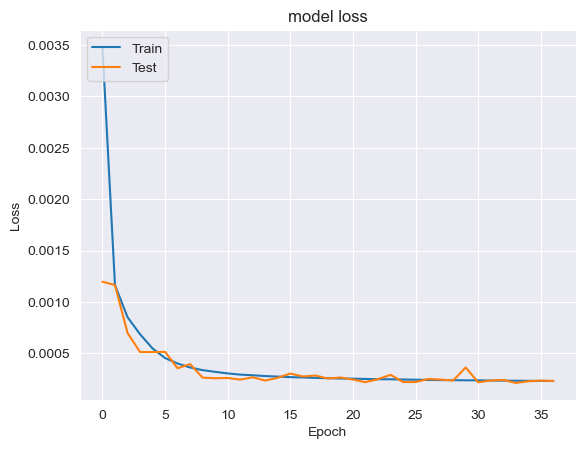

In [88]:
plot_his(history_10)

In [89]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 2.3242e-04 - rmse: 7.8530e-04 - mae: 2.3242e-04 - mse: 6.1670e-07 - mape: 0.1355


[0.0002324182423762977,
 0.0007853020215407014,
 0.0002324182423762977,
 6.166992534417659e-07,
 0.1354716718196869]

In [90]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 10s 2ms/step


In [91]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  2360.8215


# Model 11

In [92]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="linear"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 90s 4ms/step - loss: 0.0064 - rmse: 0.0345 - mae: 0.0064 - mse: 0.0012 - mape: 8.5082 - val_loss: 0.0037 - val_rmse: 0.0071 - val_mae: 0.0037 - val_mse: 5.0214e-05 - val_mape: 0.8342
Epoch 2/100
24872/24872 [==============================] - 88s 4ms/step - loss: 0.0035 - rmse: 0.0067 - mae: 0.0035 - mse: 4.5197e-05 - mape: 5.5032 - val_loss: 0.0034 - val_rmse: 0.0064 - val_mae: 0.0034 - val_mse: 4.1391e-05 - val_mape: 0.7957
Epoch 3/100
24872/24872 [==============================] - 90s 4ms/step - loss: 0.0033 - rmse: 0.0062 - mae: 0.0033 - mse: 3.8166e-05 - mape: 8.5153 - val_loss: 0.0032 - val_rmse: 0.0060 - val_mae: 0.0032 - val_mse: 3.5449e-05 - val_mape: 0.7191
Epoch 4/100
24872/24872 [==============================] - 91s 4ms/step - loss: 0.0031 - rmse: 0.0058 - mae: 0.0031 - mse: 3.3071e-05 - mape: 10.1628 - val_loss: 0.0030 - val_rmse: 0.0056 - val_mae: 0.0030 - val_mse: 3.1155e-05 - val_mape: 0.6842
Epoch 5/100
24872/2

24872/24872 [==============================] - 93s 4ms/step - loss: 0.0013 - rmse: 0.0021 - mae: 0.0013 - mse: 4.5045e-06 - mape: 21.0649 - val_loss: 0.0013 - val_rmse: 0.0021 - val_mae: 0.0013 - val_mse: 4.4371e-06 - val_mape: 0.5619
Epoch 35/100
24872/24872 [==============================] - 92s 4ms/step - loss: 0.0013 - rmse: 0.0021 - mae: 0.0013 - mse: 4.4269e-06 - mape: 21.0225 - val_loss: 0.0013 - val_rmse: 0.0021 - val_mae: 0.0013 - val_mse: 4.3414e-06 - val_mape: 0.5615
Epoch 36/100
24872/24872 [==============================] - 90s 4ms/step - loss: 0.0013 - rmse: 0.0021 - mae: 0.0013 - mse: 4.3468e-06 - mape: 21.3584 - val_loss: 0.0013 - val_rmse: 0.0021 - val_mae: 0.0013 - val_mse: 4.2996e-06 - val_mape: 0.5677
Epoch 37/100
24872/24872 [==============================] - 94s 4ms/step - loss: 0.0013 - rmse: 0.0021 - mae: 0.0013 - mse: 4.2750e-06 - mape: 21.5740 - val_loss: 0.0013 - val_rmse: 0.0020 - val_mae: 0.0013 - val_mse: 4.2014e-06 - val_mape: 0.5699
Epoch 38/100
24872/24

Epoch 67/100
24872/24872 [==============================] - 94s 4ms/step - loss: 9.6504e-04 - rmse: 0.0018 - mae: 9.6504e-04 - mse: 3.2579e-06 - mape: 26.9598 - val_loss: 9.6188e-04 - val_rmse: 0.0018 - val_mae: 9.6188e-04 - val_mse: 3.1841e-06 - val_mape: 0.4915
Epoch 68/100
24872/24872 [==============================] - 96s 4ms/step - loss: 9.5994e-04 - rmse: 0.0018 - mae: 9.5994e-04 - mse: 3.2272e-06 - mape: 26.8469 - val_loss: 9.5698e-04 - val_rmse: 0.0018 - val_mae: 9.5698e-04 - val_mse: 3.1471e-06 - val_mape: 0.4865
Epoch 69/100
24872/24872 [==============================] - 99s 4ms/step - loss: 9.5498e-04 - rmse: 0.0018 - mae: 9.5498e-04 - mse: 3.1993e-06 - mape: 26.7917 - val_loss: 9.5143e-04 - val_rmse: 0.0018 - val_mae: 9.5143e-04 - val_mse: 3.1130e-06 - val_mape: 0.4833
Epoch 70/100
24872/24872 [==============================] - 94s 4ms/step - loss: 9.5019e-04 - rmse: 0.0018 - mae: 9.5019e-04 - mse: 3.1707e-06 - mape: 26.6820 - val_loss: 9.4721e-04 - val_rmse: 0.0018 - val_m

24872/24872 [==============================] - 80s 3ms/step - loss: 8.4940e-04 - rmse: 0.0016 - mae: 8.4940e-04 - mse: 2.6793e-06 - mape: 25.6493 - val_loss: 8.4780e-04 - val_rmse: 0.0016 - val_mae: 8.4780e-04 - val_mse: 2.6163e-06 - val_mape: 0.4248
Epoch 99/100
24872/24872 [==============================] - 78s 3ms/step - loss: 8.4757e-04 - rmse: 0.0016 - mae: 8.4757e-04 - mse: 2.6688e-06 - mape: 25.6306 - val_loss: 8.4534e-04 - val_rmse: 0.0016 - val_mae: 8.4534e-04 - val_mse: 2.6001e-06 - val_mape: 0.4248
Epoch 100/100
24872/24872 [==============================] - 81s 3ms/step - loss: 8.4580e-04 - rmse: 0.0016 - mae: 8.4580e-04 - mse: 2.6583e-06 - mape: 25.7247 - val_loss: 8.4449e-04 - val_rmse: 0.0016 - val_mae: 8.4449e-04 - val_mse: 2.5948e-06 - val_mape: 0.4237
CPU times: total: 3h 38min 13s
Wall time: 2h 29min 34s


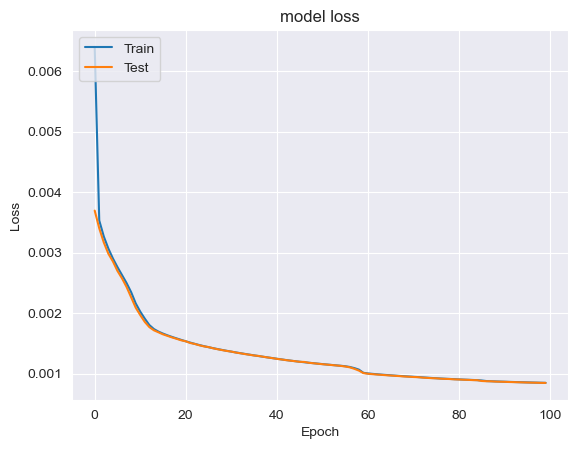

In [93]:
plot_his(history_11)

In [94]:
model_11.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 8.4449e-04 - rmse: 0.0016 - mae: 8.4449e-04 - mse: 2.5948e-06 - mape: 0.4237


[0.0008444878039881587,
 0.001610832172445953,
 0.0008444878039881587,
 2.5947804260795237e-06,
 0.42369627952575684]

In [95]:
prediction_11 = model_11.predict(X_test)

6218/6218 [==============================] - 10s 2ms/step


In [96]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  11712.821


# Model 12

In [97]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(8,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.0137 - rmse: 0.0215 - mae: 0.0137 - mse: 4.6046e-04 - mape: 30.4218 - val_loss: 0.0127 - val_rmse: 0.0200 - val_mae: 0.0127 - val_mse: 3.9857e-04 - val_mape: 5.5875
Epoch 2/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0129 - rmse: 0.0197 - mae: 0.0129 - mse: 3.8994e-04 - mape: 29.5861 - val_loss: 0.0130 - val_rmse: 0.0200 - val_mae: 0.0130 - val_mse: 3.9865e-04 - val_mape: 5.5865
Epoch 3/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0128 - rmse: 0.0197 - mae: 0.0128 - mse: 3.8973e-04 - mape: 25.1252 - val_loss: 0.0127 - val_rmse: 0.0193 - val_mae: 0.0127 - val_mse: 3.7319e-04 - val_mape: 5.3610
Epoch 4/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0127 - rmse: 0.0197 - mae: 0.0127 - mse: 3.8956e-04 - mape: 26.6741 - val_loss: 0.0126 - val_rmse: 0.0197 - val_mae: 0.0126 - val_mse: 3.8859e-04 - val_mape: 5.2819
Epoch 5/100


24872/24872 [==============================] - 75s 3ms/step - loss: 0.0126 - rmse: 0.0197 - mae: 0.0126 - mse: 3.8870e-04 - mape: 30.6767 - val_loss: 0.0125 - val_rmse: 0.0196 - val_mae: 0.0125 - val_mse: 3.8344e-04 - val_mape: 5.3438
Epoch 35/100
24872/24872 [==============================] - 74s 3ms/step - loss: 0.0126 - rmse: 0.0197 - mae: 0.0126 - mse: 3.8839e-04 - mape: 31.4189 - val_loss: 0.0126 - val_rmse: 0.0198 - val_mae: 0.0126 - val_mse: 3.9261e-04 - val_mape: 5.3333
Epoch 36/100
24872/24872 [==============================] - 75s 3ms/step - loss: 0.0126 - rmse: 0.0197 - mae: 0.0126 - mse: 3.8858e-04 - mape: 32.6162 - val_loss: 0.0125 - val_rmse: 0.0196 - val_mae: 0.0125 - val_mse: 3.8494e-04 - val_mape: 5.3412
Epoch 37/100
24872/24872 [==============================] - 75s 3ms/step - loss: 0.0126 - rmse: 0.0197 - mae: 0.0126 - mse: 3.8885e-04 - mape: 30.6628 - val_loss: 0.0125 - val_rmse: 0.0197 - val_mae: 0.0125 - val_mse: 3.8620e-04 - val_mape: 5.3443
Epoch 38/100
24872/24

24872/24872 [==============================] - 76s 3ms/step - loss: 0.0126 - rmse: 0.0197 - mae: 0.0126 - mse: 3.8841e-04 - mape: 30.8495 - val_loss: 0.0125 - val_rmse: 0.0198 - val_mae: 0.0125 - val_mse: 3.9074e-04 - val_mape: 5.3761
Epoch 68/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0126 - rmse: 0.0197 - mae: 0.0126 - mse: 3.8850e-04 - mape: 32.2477 - val_loss: 0.0126 - val_rmse: 0.0198 - val_mae: 0.0126 - val_mse: 3.9226e-04 - val_mape: 5.3758
Epoch 69/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0126 - rmse: 0.0197 - mae: 0.0126 - mse: 3.8868e-04 - mape: 30.3044 - val_loss: 0.0125 - val_rmse: 0.0197 - val_mae: 0.0125 - val_mse: 3.8956e-04 - val_mape: 5.3727
Epoch 70/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0126 - rmse: 0.0197 - mae: 0.0126 - mse: 3.8877e-04 - mape: 29.7046 - val_loss: 0.0125 - val_rmse: 0.0196 - val_mae: 0.0125 - val_mse: 3.8416e-04 - val_mape: 5.3082
Epoch 71/100
24872/24

24872/24872 [==============================] - 77s 3ms/step - loss: 0.0126 - rmse: 0.0197 - mae: 0.0126 - mse: 3.8858e-04 - mape: 30.7109 - val_loss: 0.0125 - val_rmse: 0.0197 - val_mae: 0.0125 - val_mse: 3.8745e-04 - val_mape: 5.3570
CPU times: total: 3h 5min 2s
Wall time: 2h 6min 28s


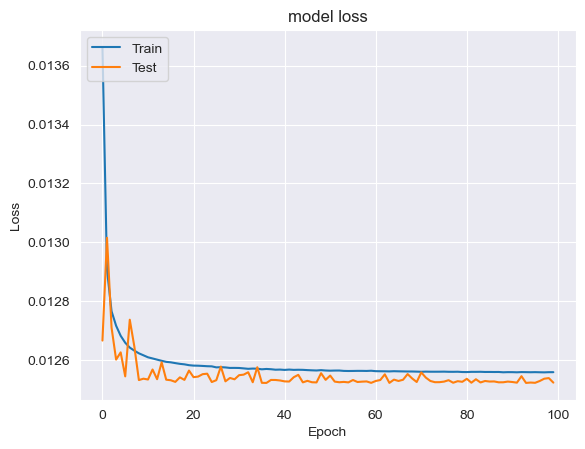

In [98]:
plot_his(history_12)

In [99]:
model_12.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 0.0125 - rmse: 0.0197 - mae: 0.0125 - mse: 3.8745e-04 - mape: 5.3570


[0.012523062527179718,
 0.01968367211520672,
 0.012523062527179718,
 0.00038744695484638214,
 5.357034206390381]

In [100]:
prediction_12 = model_12.predict(X_test)

6218/6218 [==============================] - 11s 2ms/step


In [101]:
AIC_value(model_12,prediction_12,Y_test)

AIC:  1556.8232


In [102]:
model_1.save('Nornalized_modals/model_1_Poweresti.h5')

In [103]:
model_2.save('Nornalized_modals/model_2_Poweresti.h5')

In [104]:
model_3.save('Nornalized_modals/model_3_Poweresti.h5')

In [105]:
model_4.save('Nornalized_modals/model_4_Poweresti.h5')

In [106]:
model_5.save('Nornalized_modals/model_5_Poweresti.h5')

In [107]:
model_6.save('Nornalized_modals/model_6_Poweresti.h5')

In [108]:
model_7.save('Nornalized_modals/model_7_Poweresti.h5')

In [109]:
model_8.save('Nornalized_modals/model_8_Poweresti.h5')

In [110]:
model_9.save('Nornalized_modals/model_9_Poweresti.h5')

In [111]:
model_10.save('Nornalized_modals/model_10_Poweresti.h5')

In [112]:
model_11.save('Nornalized_modals/model_11_Poweresti.h5')

In [113]:
model_12.save('Nornalized_modals/model_12_Poweresti.h5')

Text(0.5, 1.0, 'Real Vs Predicted')

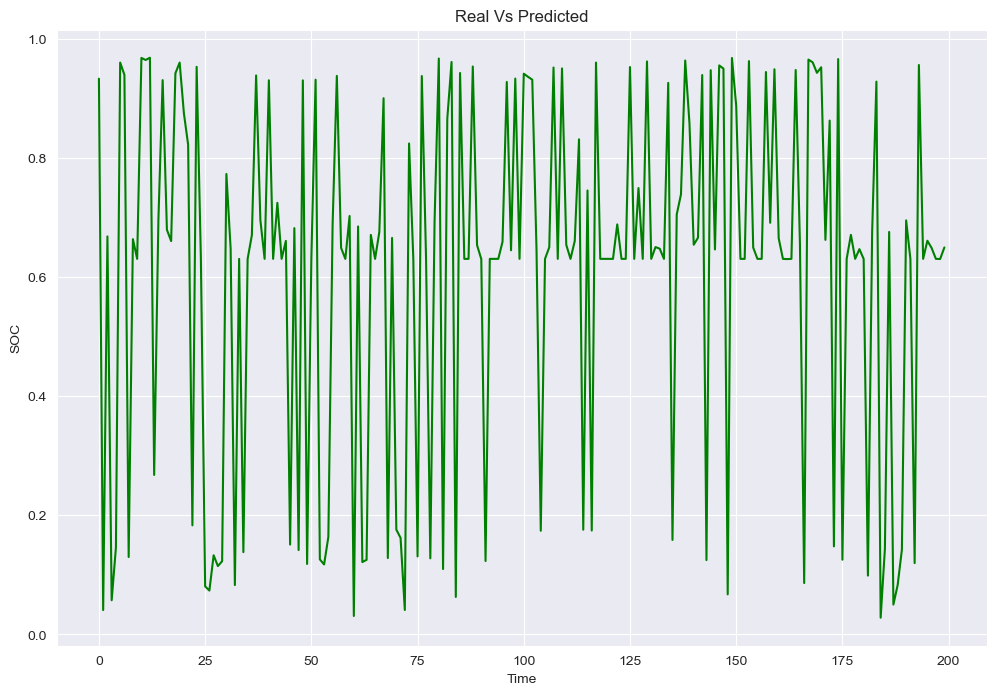

In [114]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
# plt.plot(Y[:20000],color='r')
plt.plot(Y_pred_2[:200],color='g')
plt.ylabel('SOC')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Real Vs Predicted')

In [115]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
# plt.plot(Y[:20000],color='r')
plt.plot(df['Time'],df["SOC"],color='g')
plt.ylabel('SOC')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Real Vs Predicted')

KeyError: 'Time'

<Figure size 1200x800 with 0 Axes>